This notebook demonstrates how to use the change point estimator code in this repository for a tree. There are three steps

1. load the observed tree into the Tree class
2. compute the difference statistics d_n(m)
3. threshold the difference statistics to find change point estimator

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from garden import Tree, ChangePointTreeGrower, get_attachment_fun
from change_point_estimation import compute_difference_statistics, estimate_change_point

# load data into tree class

In [2]:
# load an observed tree into the provied Tree class. All you need is an edgelist.

# This edgelist represents a tree with n=5 nodes.
# odes are zero indexed i.e the root is 0.
# the value edgelist[m] gives m's parent 
edgelist = [0, 0, 1, 3] 

tree = Tree.from_edgelist(edgelist)

In [3]:
# or simulate a synthetic change point tree using our provided code
n = 10000
gamma = .5
funs = [get_attachment_fun(family='affine', alpha=1),
        get_attachment_fun(family='affine', alpha=6)]

cp_tree_grower = ChangePointTreeGrower(n=n, funs=funs, change_point_props=gamma)
tree = cp_tree_grower.grow_cp_tree()

# run change point estimation

In [4]:
# compute difference statistics
diff_stats, anchor = compute_difference_statistics(tree, h='loglog')

In [5]:
# estimate change point from difference statistics
cp_estimate, threshold = estimate_change_point(diff_stats,h='loglog',  b='nto1overloglog')

print('estimated change point at {}'.format(cp_estimate))

estimated change point at 5394


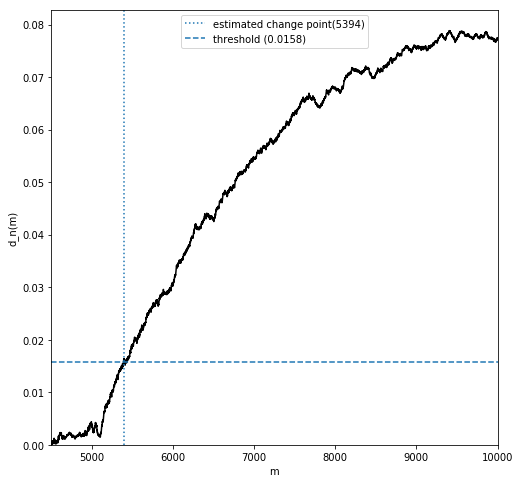

In [11]:
# plot d_n(m)
plt.figure(figsize=[8, 8])
plt.plot(diff_stats, color='black')
plt.axvline(cp_estimate, label='estimated change point({})'.format(cp_estimate), linestyle=':')
plt.axhline(threshold, label='threshold ({:1.4f})'.format(threshold), linestyle='--')
plt.xlim([anchor, n])
plt.ylim(ymin=0)
plt.ylabel('d_n(m)')
plt.xlabel('m')
plt.legend(loc='upper center')